### NLTK 자연어 처리 패키지
- 말뭉치
- 토큰 생성
- 형태소 분석
- 품사 태깅

In [1]:
import nltk

In [2]:
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\user\AppData\Roaming

True

### 말뭉치
- 자연어 분석 작업을 위핸 만든 샘플 문서 집합을 말한다

In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

### 토큰화
- 토큰화
    - 말뭉치(텍스트 데이터)를 "토큰"이라고 불리는 작은 단위로 나누는 행위
- 토큰
    - 문장, 단어, 형태소 등 분석에 있어서 의미를 가지는 단위
    - 영어의 경우에는 정규화된 단어를 토큰화 한다.
        - I am a boy. -> I + am + a + boy + .
    - 한국어의 경우에는 정규화된 형태소를 토큰화 한다.
        - 나는 소년이다. -> 나 + 는 + 소년 + 이 + 다 + .
- 토큰의 명칭
    - 토큰의 이름은 실제 토큰의 활용과 관계가 없다.
    - 숫자 혹은 기호로 나타내거나
    - 품사 등을 덧붙여서 쓰는 경우도 있음
- 형태소
     - 의미를 가진 가장 작은 말의 단위
     - 자립 형태소 : 명사, 대명사, 수사, 부사
     - 의존 형태소 : 접사, 어미, 조사

### 정규화
- 정규화(Normalization)
    - 의미와 쓰임이 같은 단어를 같은 토큰으로 표시(am, are, is -> be)
    - 의미와 쓰임이 다른 단어는 다른 토큰으로 표시(ex. fly/v 날다, fly/n 파리)
- 대소문자 통합
- 어간 추출
- 표제어 추출
- 품사 부착
- 불용어

### 어간 추출
- 어간 추출(stemming)
    - we fly, she flies, she flew -> 동일한 하나의 토큰으로
    - 단어를 어간과 접사로 분리하여 단순히 접사를 삭제하거나 교체
        - 어간(stem) : 단어의 의미를 담고 있는 핵심 부분
        - 접사(affix) : 단어에 부가적인 의미를 주는 부분
        - fly, flies, flew -> fl
- 단순 알고리즘 사용
    - 포터(Porter) 알고리즘
    - 랭케스터(Lancaster) 알고리즘

### 표제어 추출(Lemmatization)
- 기본 사전형 단어로 변형
- am, are, is, was, were -> be
- has, had -> have
- 사전정보(WordNet) 사용

### 품사부착
- 품사(POS, Part-Of-Speach)
    - 단어의 쓰임에 따른 구분
- 동일한 철자의 단어가 다른 의미나 품사로 쓰이는 경우
    - 다른 토큰으로 토큰화해야 한다.

### 불용어
- 불용어(Stop-Words)
    - 분석에 필요성이 없는 단어
    - 대부분 관사
    - 모든 문서에서 너무 자주 쓰이는 단어
    - 너무 드물게 나타나는 단어

In [5]:
# Step 1 : 토큰화
# word_tokenize
sent = emma_raw[50:196]
print(sent)

Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence


In [6]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence']

In [7]:
# step 2 : 어간 추출
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']

print("Poter Stemmer : ", [st1.stem(w) for w in words]) # PorterStemmer의 한계
print("Lancaster Stemmer :", [st2.stem(w) for w in words]) 

Poter Stemmer :  ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer : ['fly', 'fli', 'fly', 'flew', 'flown']


In [8]:
# step 3: 표제어 추출
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
[lm.lemmatize(w, pos = 'v') for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [9]:
# NLTK의 pos_tag사용
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list # 품사 이름이 붙음 tag

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [10]:
def tokenizer(doc):
    return ["/".join(p) for p in tagged_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [11]:
from nltk.corpus import stopwords
stopwords.words("english")[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

### NLTK의 빈도 분석
- 두 가지 클래스 사용
    - Text 클래스
        - plot : 단어 빈도 그래프
        - dispersion_plot : 단어 위치 그래프
        - concordance : 단어 문맥 인쇄
        - similar : 유사 단어 검색 
    - FreqDist 클래스
    

In [12]:
# Step 1 : 클래스 객체 생성
from nltk import Text
import matplotlib.pyplot as plt
text = Text(word_tokenize(emma_raw))

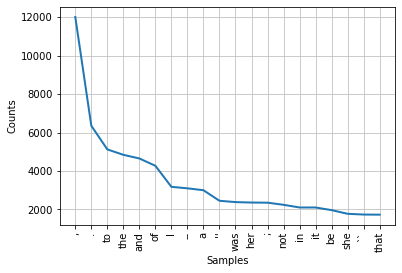

In [13]:
# Step 2 : 단어 빈도 그래프
text.plot(20) # 가장 많이 사용되는 top20
plt.show()

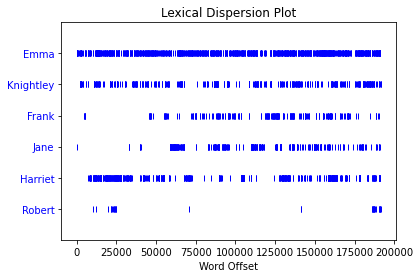

In [14]:
# Step 3 : 단어 위치 그래프
text.dispersion_plot(['Emma', 'Knightley', 'Frank', 'Jane', 'Harriet', 'Robert'])

In [15]:
# Step 4 : 단어 문맥 인쇄
text.concordance('Emma') # Emma기준으로 앞에 있는 단어 1개, 뒤에 있는 단어 1개를 문맥이라고 한다.
# window가 2인경우 앞에 있는단어 2개, 뒤에 있는 단어 2개를 문맥이라고 한다.
# 문맥인쇄는 window가 1이다.
# 문맥은 I, Woodhouse
# 문맥은 of, .

Displaying 25 of 855 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were the power of havin
ding-day of this beloved friend that Emma first sat in mournful thought of any
ing only half a mile from them ; but Emma was aware that great must be the dif
y . It was a melancholy change ; and Emma could not but sigh over it , and wis
 the rest of her life at Hartfield . Emma smiled and chatted as cheerfully as 
able to tell her how we all are . '' Emma spared no exertions to maintain this
 ' I have a great regard for you and Emma ; but when it comes to the question 
ful , troublesome creature ! '' said Emma playfully . `` That is what you have
e few people who could see faults in Emma Woodhouse , and

In [16]:
# Step 5 : 유사 단어 검색
# 문맥이 같은거 찾는다
text.similar('Emma', 1)

she


In [17]:
# Step 공통 문맥 인쇄
text.common_contexts(["Emma", "she"], 1) # said Emma i, said she i

said_i


### FreqDist 클래스
- 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다.
- Text클래스의 vocab 메서드로 추출할 수 있다.
- N : 빈도(횟수)
- freq : 빈도(퍼센트)
- most_common : 가장 많이 나오는 단어
- plot : 가장 많이 나오는 단어 플롯
    

In [18]:
# Step 1 : Text 클래스에서 생성
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [29]:
# Step 2 : 토큰 리스트에서 생성
# 사람의 이름(NNP)만 모아서 FreqDist 클래스 객체를 만들었다.
# 품사 태그에서 NNP(고유대명사)이면서 필요없는 단어(stop words)는 제거했다.
from nltk import FreqDist
stopwords = ['Mr.', 'Mrs.', 'Miss', 'Mr', 'Mrs', 'Dear']
emma_tokens = pos_tag(word_tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == 'NNP' and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [20]:
# Step 3 : 단어 빈도 분석
fd_names.N(), fd_names['Emma'], fd_names.freq('Emma')

(6924, 829, 0.11972848064702483)

In [21]:
# most_common : 메서드를 사용하면서 가장 출현 횟수가 높은 단어를 찾는다.
fd_names.most_common(5)

[('Emma', 829),
 ('Harriet', 477),
 ('Weston', 429),
 ('Elton', 374),
 ('Knightley', 373)]

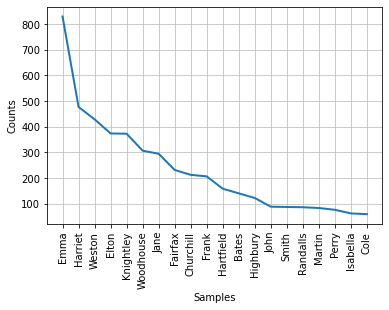

In [24]:
fd_names.plot(20)
plt.show()

### 워드클라우드


In [25]:
!pip install wordcloud

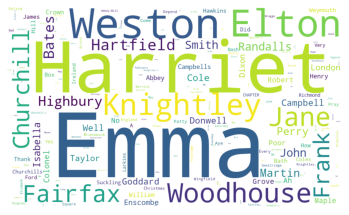

In [26]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()